**<h1><font color='green'> Ground Water Hand Pump Status Prediction (Model Experiments)**

###Installing/Importing Dependancies

In [1]:
# Necessary Installations
!pip install catboost

# Necessary library imports
# Python related
import warnings
warnings.filterwarnings("ignore")
import random
import gdown
from tqdm import tqdm
import joblib
# Data Processing
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 200)
# Graphing and plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster
from IPython.display import display
# Machine Learning
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy import sparse
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from prettytable import PrettyTable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


###Downloading Encoded train and test data

In [2]:
!gdown 1Mt90InGdsMGof7gpa3Sz89MzzqyX0uKf
!gdown 1pO77G1xs3SHL_8wx3zF9aeaa8XrfNsN8
!gdown 11lUp8Snx_TDsz_fmfVlVX4wdWDjd1dC2
!gdown 19N8EKj60S8PeMbxfmIJYhseavAUWqni2

Downloading...
From: https://drive.google.com/uc?id=1Mt90InGdsMGof7gpa3Sz89MzzqyX0uKf
To: /content/xtrain.npz
100% 1.67M/1.67M [00:00<00:00, 170MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pO77G1xs3SHL_8wx3zF9aeaa8XrfNsN8
To: /content/xtest.npz
100% 419k/419k [00:00<00:00, 113MB/s]
Downloading...
From: https://drive.google.com/uc?id=11lUp8Snx_TDsz_fmfVlVX4wdWDjd1dC2
To: /content/ytrain.npy
100% 380k/380k [00:00<00:00, 79.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=19N8EKj60S8PeMbxfmIJYhseavAUWqni2
To: /content/ytest.npy
100% 95.2k/95.2k [00:00<00:00, 52.9MB/s]


In [3]:
# Reading data
X_train_encoded = sparse.load_npz("/content/xtrain.npz")
X_test_encoded = sparse.load_npz("/content/xtest.npz")
y_train_encoded = np.load("/content/ytrain.npy")
y_test_encoded = np.load("/content/ytest.npy")

In [4]:
# Verufy data shapes
print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

X_train_encoded shape: (47520, 249)
X_test_encoded shape: (11880, 249)
y_train_encoded shape: (47520,)
y_test_encoded shape: (11880,)


# <font color='orange'>7. ML Models

##<font color='brown'>7.1 Baseline Models </font>

We will compare model performances with baseline models performances.

### 7.1.1 Simple Baseline Model

We will create a simple rule based model that will predict that each record belongs to the majority class labels. This will be  Dumb Baseline model which does not involve any learning from data.

In [ ]:
# Rule based Baseline model
y_pred_train = np.zeros(shape=y_train_encoded.shape)
y_pred_test = np.zeros(shape=y_test_encoded.shape)
fscore_train = f1_score(y_train_encoded, y_pred_train, average='micro')
fscore_test = f1_score(y_test_encoded, y_pred_test, average='micro')
print(f"Dumb model f1_score on train data: {np.round(fscore_train, 4)}")
print(f"Dumb model f1_score on test data: {np.round(fscore_test, 4)}")

Dumb model f1_score on train data: 0.5431
Dumb model f1_score on test data: 0.5431


### 7.1.2 ML Baseline Model

We will check the performance of simple ML model Logistic Regression as our ML Baseline Model.

In [ ]:
# Logistic Regression as Baseline Model
lr = LogisticRegression("l2", multi_class="ovr")
lr.fit(X_train_encoded, y_train_encoded)
y_pred_train = lr.predict(X_train_encoded)
y_pred_test = lr.predict(X_test_encoded)
fscore_train = f1_score(y_train_encoded, y_pred_train, average='micro')
fscore_test = f1_score(y_test_encoded, y_pred_test, average='micro')
print(f"ML Baseline (LR) model micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"ML Baseline (LR) model micro f1_score on test data: {np.round(fscore_test, 4)}")

ML Baseline (LR) model micro f1_score on train data: 0.748
ML Baseline (LR) model micro f1_score on test data: 0.7492


##<font color='brown'>7.2 Model Experiments </font>

### 7.2.1 Check performances of various Models

In [ ]:
# Check performances of various models

# Defining models
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          BaggingClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          CatBoostClassifier()]

# Model names
model_names = ["KNN Classifier", "Decision Tree Classifier",
               "Random Forest Clasifier", "XGBoost Classifier",
               "Bagging Classifier", "AdaBoost Classifier",
               "Gradient Boosted Classifier",
               "CatBoost Classifier"]

# Initialize scores
train_fscores = []
train_aucs = []
test_fscores = []
test_aucs = []
fit_time= []
 

for model in tqdm(models):
    cv_result = cross_validate(model, X_train_encoded, y_train_encoded, 
                               scoring=["f1_micro", "roc_auc_ovr"], cv=5,
                               return_train_score=True, n_jobs=-1)
    
    train_fscores.append(np.mean(cv_result.get("train_f1_micro")))
    test_fscores.append(np.mean(cv_result.get("test_f1_micro")))
    train_aucs.append(np.mean(cv_result.get("train_roc_auc_ovr")))
    test_aucs.append(np.mean(cv_result.get("test_roc_auc_ovr")))
    fit_time.append(np.mean(cv_result.get("fit_time")))

results_df = pd.DataFrame({"Model": model_names,
                           "Fit Time": fit_time,
                           "Train micro_f1": train_fscores,
                           "Test micro_f1": test_fscores,
                           "Train auc_score": train_aucs,
                           "Test auc_score": test_aucs})

100%|██████████| 8/8 [27:37<00:00, 207.24s/it]


In [ ]:
results_df

,Model,Fit Time,Train micro_f1,Test micro_f1,Train auc_score,Test auc_score
0,KNN Classifier,0.022109,0.834343,0.768897,0.949441,0.841951
1,Decision Tree Classifier,5.605018,0.998101,0.741077,0.999992,0.739588
2,Random Forest Clasifier,95.897448,0.998064,0.796780,0.999908,0.886780
3,XGBoost Classifier,14.650457,0.750316,0.746928,0.852774,0.844709
4,Bagging Classifier,42.880020,0.980940,0.783838,0.999195,0.858472
5,AdaBoost Classifier,5.149777,0.722827,0.722054,0.799218,0.795958
6,Gradient Boosted Classifier,50.168778,0.760054,0.755219,0.860642,0.848878
7,CatBoost Classifier,51.435589,0.823211,0.791793,0.927234,0.889166


__Obervations(s)__:

Following models show better performances
1. Random Forest Classifier
2. XGBoost Classifier
3. Bagging Classifier
4. CatBoost Classifier

In [6]:
# Defining necessary functions

def plot_confusion_matrix(y_true, y_pred):
    """
    Plots confusion matrix heatmap from y_true and y_pred
    """

    cmat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cmat, cmap='Greens', annot=True, fmt='g',
                xticklabels=['functional', 'needs_repair', 'non-functional'],
                yticklabels=['functional', 'needs_repair', 'non-functional'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels") 

def plot_parameter_performance(param: list, train_scores:list, test_scores:list,
                               param_name:str):
    """
    This function plots model performance for various values of parameters
    """
    fig = plt.figure()
    plt.plot(param, train_scores, label="Train")
    plt.plot(param, test_scores, label="Test")
    plt.legend()
    plt.title(f"{param_name} Vs. Model Performance")
    plt.xlabel(f"{param_name}")
    plt.ylabel("micro_f1_score")
    plt.show()

###7.2.2 Random Forest Classifier


Finding Optimal Parameters using Grid Search

In [ ]:
# Hyper Parameter Tuning for Random Forest Classifier

# Estimator
rfc = RandomForestClassifier(random_state=42, warm_start=True)

# params
params = {"n_estimators": [100, 150, 200, 250],
          "max_depth": [6, 10, 20, 24, 40, 60],
          "min_samples_split": [4, 6, 8, 10],
          "max_features": ['sqrt', 'log2']}

grid_cv = GridSearchCV(rfc, params, scoring=["f1_micro", "roc_auc_ovr"],
                      n_jobs=-1, cv=6, refit="f1_micro")

grid_cv.fit(X_train_encoded, y_train_encoded)

GridSearchCV(cv=6,
             estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [6, 10, 20, 24, 40, 60],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [100, 150, 200, 250]},
             refit='f1_micro', scoring=['f1_micro', 'roc_auc_ovr'])

In [ ]:
# Best Estimator
grid_cv.best_estimator_

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                       n_estimators=250, random_state=42, warm_start=True)

Finding best value for n_estimators parameter

In [ ]:
# best n_estimators
estimators = [200, 250, 280, 300, 320, 350, 380]
train_f1 = []
test_f1 = []

for i in estimators:
    rf = RandomForestClassifier(max_depth=40,
                                max_features='sqrt',
                                min_samples_split=8,
                                n_estimators=i,
                                random_state=42,
                                warm_start=False)

    # Training
    rf.fit(X_train_encoded, y_train_encoded)

    # Predictions
    ypred_train = rf.predict(X_train_encoded)
    ypred_test = rf.predict(X_test_encoded)

    # micro_f1 scores
    f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
    train_f1.append(f1_train)
    f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
    test_f1.append(f1_test)
    print("\n")
    print(f"******************** For n_estimators = {i} *******************************")
    print(f"Random Forest Model train micro_f1_score: {f1_train}")
    print(f"Random Forest Model test micro_f1_score: {f1_test}")



******************** For n_estimators = 200 *******************************
Random Forest Model train micro_f1_score: 0.9101010101010101
Random Forest Model test micro_f1_score: 0.8105218855218856


******************** For n_estimators = 250 *******************************
Random Forest Model train micro_f1_score: 0.9102483164983165
Random Forest Model test micro_f1_score: 0.811952861952862


******************** For n_estimators = 280 *******************************
Random Forest Model train micro_f1_score: 0.9103956228956229
Random Forest Model test micro_f1_score: 0.8132154882154882


******************** For n_estimators = 300 *******************************
Random Forest Model train micro_f1_score: 0.9101851851851852
Random Forest Model test micro_f1_score: 0.8132154882154882


******************** For n_estimators = 320 *******************************
Random Forest Model train micro_f1_score: 0.9104166666666667
Random Forest Model test micro_f1_score: 0.8127104377104377


****

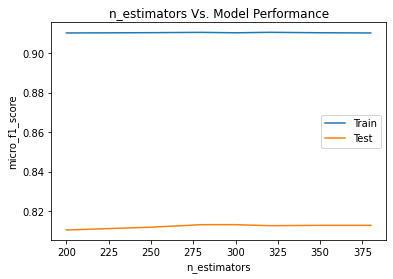

In [ ]:
# Plot parameter vs model
plot_parameter_performance(estimators, train_f1, test_f1,
                           "n_estimators")

__Observation(s)__:

We got best hyper parameters for Random Forest Classifier as

1. max_depth=40,
2. max_features='sqrt'
3. min_samples_split=8,
4. n_estimators=280

<b>Best Random Forest Classifier Model</b>

micro f1_score on train data: 0.9104
micro f1_score on test data: 0.8132
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.61      0.29      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.66      0.69     11880
weighted avg       0.81      0.81      0.80     11880



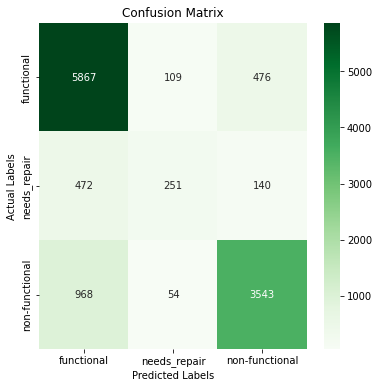

In [7]:
# Best Random Forest Model
best_rf = RandomForestClassifier(max_depth=40,
                                 max_features='sqrt',
                                 min_samples_split=8,
                                 n_estimators=280,
                                 random_state=42,
                                 warm_start=False)

# Training
best_rf.fit(X_train_encoded, y_train_encoded)

# Predictions
ypred_train = best_rf.predict(X_train_encoded)
ypred_test = best_rf.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")

# Performance on test data
rf_report = classification_report(y_test_encoded, ypred_test)
print(rf_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

In [8]:
joblib.dump(best_rf, 'ml_model.joblib', compress=3)

['ml_model.joblib']

### 7.2.3 XGBoost Classifier

Finding Optimal Parameters using Grid Search

In [ ]:
# Hyper Parameter Tuning for Random Forest Classifier

# Estimator
xgbc = XGBClassifier(random_state=42)

# params
params = {"n_estimators": [100, 150, 200, 250],
          "max_depth": [8, 10, 12, 14],
          "colsample_bytree ": [0.3, 0.5],
          "eta": [0.2, 0.1,0.3]}

grid_cv = GridSearchCV(xgbc, params, scoring=["f1_micro", "roc_auc_ovr"],
                      n_jobs=-1, cv=6, refit="f1_micro")

grid_cv.fit(X_train_encoded, y_train_encoded)

GridSearchCV(cv=6, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree ': [0.3, 0.5],
                         'eta': [0.2, 0.1, 0.3], 'max_depth': [8, 10, 12, 14],
                         'n_estimators': [100, 150, 200, 250]},
             refit='f1_micro', scoring=['f1_micro', 'roc_auc_ovr'])

In [ ]:
grid_cv.best_estimator_

XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12, n_estimators=250,
              objective='multi:softprob', random_state=42)

Finding best value for n_estimators parameter

In [ ]:
# best n_estimators
estimators = [200, 250, 280, 300, 320, 350, 380]
train_f1 = []
test_f1 = []

for i in estimators:
    xgbc = XGBClassifier(colsample_bytree =0.3,
                            eta=0.2,
                            max_depth=12,
                            n_estimators=i,
                            objective='multi:softprob',
                            random_state=42)


    # Training
    xgbc.fit(X_train_encoded, y_train_encoded)

    # Predictions
    ypred_train = xgbc.predict(X_train_encoded)
    ypred_test = xgbc.predict(X_test_encoded)

    # micro_f1 scores
    f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
    train_f1.append(f1_train)
    f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
    test_f1.append(f1_test)
    print()
    print(f"******************** For n_estimators = {i} *******************************")
    print(f"XGBoost Classifier Model train micro_f1_score: {f1_train}")
    print(f"XGBoost Classifier Model test micro_f1_score: {f1_test}")


******************** For n_estimators = 200 *******************************
XGBoost Classifier Model train micro_f1_score: 0.8982744107744107
XGBoost Classifier Model test micro_f1_score: 0.8095959595959596

******************** For n_estimators = 250 *******************************
XGBoost Classifier Model train micro_f1_score: 0.9069023569023569
XGBoost Classifier Model test micro_f1_score: 0.8101010101010101

******************** For n_estimators = 280 *******************************
XGBoost Classifier Model train micro_f1_score: 0.9115740740740741
XGBoost Classifier Model test micro_f1_score: 0.8105218855218856

******************** For n_estimators = 300 *******************************
XGBoost Classifier Model train micro_f1_score: 0.9146043771043771
XGBoost Classifier Model test micro_f1_score: 0.8108585858585858

******************** For n_estimators = 320 *******************************
XGBoost Classifier Model train micro_f1_score: 0.9183922558922559
XGBoost Classifier Model 

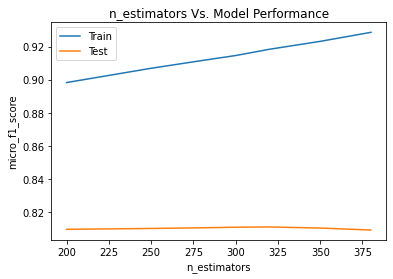

In [ ]:
# Plot parameter vs model
plot_parameter_performance(estimators, train_f1, test_f1,
                           "n_estimators")

__Observation(s)__:

We got best hyper parameters for Random Forest Classifier as

1. colsample_bytree =0.3
2. eta=0.2
3. max_depth=12
4. n_estimators=320,
5. objective='multi:softprob'

__Best XGBoost Classifier Model__

micro f1_score on train data: 0.9184
micro f1_score on test data: 0.811
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6452
           1       0.62      0.27      0.38       863
           2       0.86      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



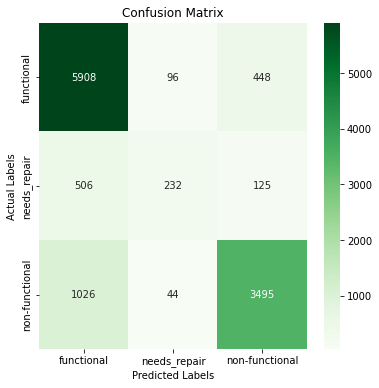

In [ ]:
# Best XGBoost Classifier Model
best_xgbc = XGBClassifier(colsample_bytree =0.3,
                          eta=0.2,
                          max_depth=12,
                          n_estimators=320,
                          objective='multi:softprob',
                          random_state=42)

# Training
best_xgbc.fit(X_train_encoded, y_train_encoded)

# predictions
ypred_train = best_xgbc.predict(X_train_encoded)
ypred_test = best_xgbc.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")

# Performance on test data
xgbc_report = classification_report(y_test_encoded, ypred_test)
print(xgbc_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

### 7.2.4 CatBoost Classifier

Finding Optimal Parameters using Random Search

In [ ]:
# Hyper Parameter Tuning for Random Forest Classifier

# Estimator
cbc = CatBoostClassifier(random_seed=42)

# params
params = {"iterations": [100, 150, 200, 250],
          "depth": [4, 6, 10, 12, 14, 16],
          "learning_rate": [0.1, 0.2, 0.3, 0.5]}

rand_cv = RandomizedSearchCV(cbc, params, scoring="f1_micro", n_iter=35,
                      n_jobs=-1, cv=6, refit=True)

rand_cv.fit(X_train_encoded, y_train_encoded)

0:	learn: 0.9584316	total: 195ms	remaining: 48.7s
1:	learn: 0.8725791	total: 328ms	remaining: 40.7s
2:	learn: 0.8134038	total: 481ms	remaining: 39.6s
3:	learn: 0.7687669	total: 613ms	remaining: 37.7s
4:	learn: 0.7362539	total: 750ms	remaining: 36.7s
5:	learn: 0.7089689	total: 879ms	remaining: 35.8s
6:	learn: 0.6912610	total: 1.02s	remaining: 35.3s
7:	learn: 0.6743824	total: 1.16s	remaining: 35s
8:	learn: 0.6582188	total: 1.29s	remaining: 34.7s
9:	learn: 0.6456305	total: 1.44s	remaining: 34.4s
10:	learn: 0.6353680	total: 1.57s	remaining: 34.2s
11:	learn: 0.6268959	total: 1.71s	remaining: 33.8s
12:	learn: 0.6194044	total: 1.84s	remaining: 33.6s
13:	learn: 0.6140530	total: 1.97s	remaining: 33.3s
14:	learn: 0.6072396	total: 2.11s	remaining: 33s
15:	learn: 0.6025558	total: 2.25s	remaining: 32.9s
16:	learn: 0.5973593	total: 2.39s	remaining: 32.7s
17:	learn: 0.5933285	total: 2.52s	remaining: 32.4s
18:	learn: 0.5889870	total: 2.65s	remaining: 32.3s
19:	learn: 0.5841307	total: 2.78s	remaining: 

RandomizedSearchCV(cv=6,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f055f4e9510>,
                   n_iter=35, n_jobs=-1,
                   param_distributions={'depth': [4, 6, 10, 12, 14, 16],
                                        'iterations': [100, 150, 200, 250],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.5]},
                   scoring='f1_micro')

In [ ]:
rand_cv.best_estimator_

In [ ]:
result_df = pd.DataFrame(rand_cv.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_iterations,param_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,64.138755,0.564468,0.064180,0.011031,0.5,100,12,"{'learning_rate': 0.5, 'iterations': 100, 'dep...",0.789268,0.786995,0.784217,0.793308,0.787121,0.788763,0.788279,0.002769,15
1,159.750548,0.484154,0.097725,0.013322,0.2,250,12,"{'learning_rate': 0.2, 'iterations': 250, 'dep...",0.795076,0.792929,0.791667,0.800758,0.791540,0.792803,0.794129,0.003183,3
2,14.350227,0.648129,0.073033,0.012251,0.2,250,6,"{'learning_rate': 0.2, 'iterations': 250, 'dep...",0.785354,0.781439,0.781187,0.785480,0.778409,0.782702,0.782428,0.002470,20
3,1251.589508,19.993932,0.097679,0.017683,0.1,100,16,"{'learning_rate': 0.1, 'iterations': 100, 'dep...",0.789141,0.786869,0.785101,0.797222,0.783586,0.791414,0.788889,0.004517,13
4,591.999807,2.331425,0.109238,0.024158,0.3,200,14,"{'learning_rate': 0.3, 'iterations': 200, 'dep...",0.784848,0.791919,0.785985,0.796591,0.784848,0.788636,0.788805,0.004274,14
5,11.182479,0.102015,0.066438,0.010226,0.3,200,6,"{'learning_rate': 0.3, 'iterations': 200, 'dep...",0.783081,0.783460,0.779924,0.785606,0.779798,0.783207,0.782513,0.002055,19
6,11.277503,0.077434,0.069874,0.011682,0.1,200,6,"{'learning_rate': 0.1, 'iterations': 200, 'dep...",0.771465,0.763636,0.770328,0.771591,0.764141,0.765530,0.767782,0.003417,31
7,94.931426,0.773893,0.077489,0.014197,0.1,150,12,"{'learning_rate': 0.1, 'iterations': 150, 'dep...",0.792045,0.784848,0.786490,0.797475,0.784596,0.788889,0.789057,0.004546,12
8,61.430674,0.743234,0.104844,0.016397,0.2,250,10,"{'learning_rate': 0.2, 'iterations': 250, 'dep...",0.794571,0.795833,0.792045,0.799874,0.795328,0.796086,0.795623,0.002321,1
9,4.391238,0.085531,0.051922,0.011236,0.2,100,4,"{'learning_rate': 0.2, 'iterations': 100, 'dep...",0.754798,0.752020,0.756439,0.761237,0.751641,0.754293,0.755072,0.003205,34


In [ ]:
best_estimator = result_df.loc[8, ['params']]
print(best_estimator)

params    {'learning_rate': 0.2, 'iterations': 250, 'dep...
Name: 8, dtype: object


In [ ]:
# best estimator = {'learning_rate': 0.2, 'iterations': 250, 'depth = 10}

Finding best value of iterations parameter

In [ ]:
# best iterations
estimators = [200, 250, 280, 300, 320, 350, 380, 400, 420, 450]
train_f1 = []
test_f1 = []

for i in estimators:
    cbc = CatBoostClassifier(learning_rate=0.2, 
                            iterations = i,
                            depth=10, 
                            random_seed=42,
                            verbose=0)


    # Training
    cbc.fit(X_train_encoded, y_train_encoded)

    # Predictions
    ypred_train = cbc.predict(X_train_encoded)
    ypred_test = cbc.predict(X_test_encoded)

    # micro_f1 scores
    f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
    train_f1.append(f1_train)
    f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
    test_f1.append(f1_test)
    print()
    print(f"******************** For n_estimators = {i} *******************************")
    print(f"CatBoost Classifier Model train micro_f1_score: {f1_train}")
    print(f"CatBoost Classifier Model test micro_f1_score: {f1_test}")


******************** For n_estimators = 200 *******************************
CatBoost Classifier Model train micro_f1_score: 0.8400462962962963
CatBoost Classifier Model test micro_f1_score: 0.7942760942760942

******************** For n_estimators = 250 *******************************
CatBoost Classifier Model train micro_f1_score: 0.8500210437710438
CatBoost Classifier Model test micro_f1_score: 0.7943602693602694

******************** For n_estimators = 280 *******************************
CatBoost Classifier Model train micro_f1_score: 0.8554503367003367
CatBoost Classifier Model test micro_f1_score: 0.7971380471380471

******************** For n_estimators = 300 *******************************
CatBoost Classifier Model train micro_f1_score: 0.8577651515151515
CatBoost Classifier Model test micro_f1_score: 0.7965488215488217

******************** For n_estimators = 320 *******************************
CatBoost Classifier Model train micro_f1_score: 0.8616792929292929
CatBoost Classif

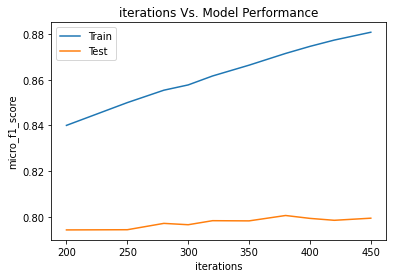

In [ ]:
# Plot parameter vs model
plot_parameter_performance(estimators, train_f1, test_f1,
                           "iterations")

__Observation(s)__:

We got best hyper parameters for Random Forest Classifier as

1. learning_rate=0.2 
2. iterations = 380
3. depth=10 

__Best CatBoost Classifier Model__

micro f1_score on train data: 0.8715
micro f1_score on test data: 0.8006
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6452
           1       0.57      0.28      0.37       863
           2       0.84      0.76      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.73      0.65      0.67     11880
weighted avg       0.79      0.80      0.79     11880



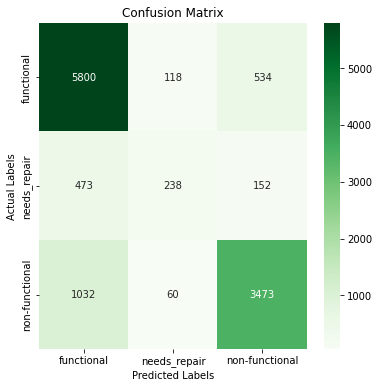

In [ ]:
# best cat boost model
best_cbc = CatBoostClassifier(learning_rate=0.2, 
                         iterations = 380,
                         depth=10, 
                         random_seed=42,
                         verbose=0)

# Training
best_cbc.fit(X_train_encoded, y_train_encoded)

# Predictions
ypred_train = best_cbc.predict(X_train_encoded)
ypred_test = best_cbc.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")

# Performance on test data
rf_report = classification_report(y_test_encoded, ypred_test)
print(rf_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

###7.2.5 Bagging Classifier

Finding Optimal Parameters using Grid Search

In [ ]:
# Hyper Parameter Tuning for Bagging Classifier

# Estimator
bgc = BaggingClassifier(random_state=42)

# params
params = {'n_estimators': [100, 200, 300, 400, 500, 600],
          'max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}

bagging_cv = GridSearchCV(bgc, params, scoring=["f1_micro", "roc_auc_ovr"], cv=5,
                       refit="f1_micro")

bagging_cv.fit(X_train_encoded, y_train_encoded)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid={'max_features': [0.2, 0.25, 0.3, 0.35, 0.4],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             refit='f1_micro', scoring=['f1_micro', 'roc_auc_ovr'])

In [ ]:
bagging_cv.best_score_

0.8039772727272727

In [ ]:
bagging_cv.best_params_

{'max_features': 0.4, 'n_estimators': 400}

__Observation(s)__:

Best Bagging Classifier Model Parameters
1. 'max_features': 0.4
2. 'n_estimators': 400

__Best Bagging Classifier Model__

micro f1_score on train data: 0.9933
micro f1_score on test data: 0.8093
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.59      0.28      0.38       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.68     11880
weighted avg       0.80      0.81      0.80     11880



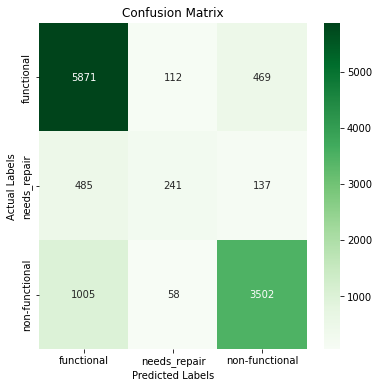

In [ ]:
# Best bagging classifier model
best_bgc = BaggingClassifier(n_estimators = 400,
                             max_features = 0.4)

# training
best_bgc.fit(X_train_encoded, y_train_encoded)

# Predictions
ypred_train = best_bgc.predict(X_train_encoded)
ypred_test = best_bgc.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")

# Performance on test data
rf_report = classification_report(y_test_encoded, ypred_test)
print(rf_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

###7.2.6 Logistic Regression (SGD) Classifier

Trying Logistic regression with SGD optimizer for various values of regularization factor (alpha)

In [ ]:
#Hyper Parameter Tuning for Random Forest Classifier
# params
lr_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.25, 1.5, 2]

train_f1 = []
test_f1 = []

for i in lr_list:
    #Estimator
    lrsgd = SGDClassifier(loss='log', penalty='l2',
                    alpha=i, random_state=42)

    # Training
    lrsgd.fit(X_train_encoded, y_train_encoded)

    # Predictions
    ypred_train = lrsgd.predict(X_train_encoded)
    ypred_test = lrsgd.predict(X_test_encoded)

    # micro_f1 scores
    f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
    train_f1.append(f1_train)
    f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
    test_f1.append(f1_test)
    print("\n")
    print(f"******************** For alpha = {i} *******************************")
    print(f"Logistic Regression(SGD) Model train micro_f1_score: {f1_train}")
    print(f"Logistic Regression(SGD) Model test micro_f1_score: {f1_test}")



******************** For alpha = 1e-06 *******************************
Logistic Regression(SGD) Model train micro_f1_score: 0.6814393939393939
Logistic Regression(SGD) Model test micro_f1_score: 0.6839225589225589


******************** For alpha = 1e-05 *******************************
Logistic Regression(SGD) Model train micro_f1_score: 0.743834175084175
Logistic Regression(SGD) Model test micro_f1_score: 0.7460437710437711


******************** For alpha = 0.0001 *******************************
Logistic Regression(SGD) Model train micro_f1_score: 0.7480429292929293
Logistic Regression(SGD) Model test micro_f1_score: 0.7485690235690236


******************** For alpha = 0.001 *******************************
Logistic Regression(SGD) Model train micro_f1_score: 0.7454124579124579
Logistic Regression(SGD) Model test micro_f1_score: 0.7463804713804714


******************** For alpha = 0.01 *******************************
Logistic Regression(SGD) Model train micro_f1_score: 0.727882996

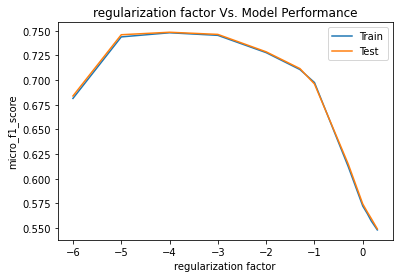

In [ ]:
# Plot curve
plot_parameter_performance(np.log10(lr_list), train_f1, test_f1, 'regularization factor')

__Observation(s)__: For alpha = 0.0001 we got max micro_f1_score

__Best Logistic Regression Model__

micro f1_score on train data: 0.748
micro f1_score on test data: 0.7486
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      6452
           1       0.61      0.11      0.19       863
           2       0.76      0.69      0.73      4565

    accuracy                           0.75     11880
   macro avg       0.71      0.56      0.57     11880
weighted avg       0.74      0.75      0.73     11880



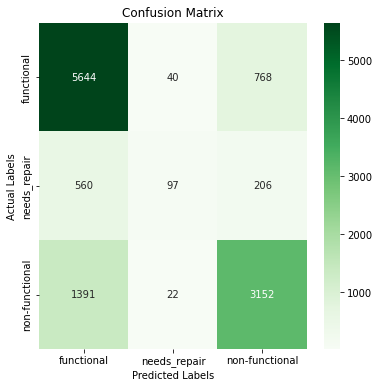

In [ ]:
# Best Logistic Regression Model
best_lr = SGDClassifier(loss='log', penalty='l2',
                   alpha=0.0001, random_state=42)

best_lr.fit(X_train_encoded, y_train_encoded)

# predictions
ypred_train = best_lr.predict(X_train_encoded)
ypred_test = best_lr.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")

# Performance on test data
rf_report = classification_report(y_test_encoded, ypred_test)
print(rf_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

### 7.2.7 Support Vector (SGD) Classifier

Trying Supprt vector classifier with SGD optimizer for various values of regularization factor (alpha) 

In [ ]:
#Hyper Parameter Tuning for Random Forest Classifier
# params
lr_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.25, 1.5, 2]

train_f1 = []
test_f1 = []

for i in lr_list:
    #Estimator
    svcsgd = SGDClassifier(loss='hinge', penalty='l2',
                    alpha=i, random_state=42)

    # Training
    svcsgd.fit(X_train_encoded, y_train_encoded)

    # Predictions
    ypred_train = svcsgd.predict(X_train_encoded)
    ypred_test = svcsgd.predict(X_test_encoded)

    # micro_f1 scores
    f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
    train_f1.append(f1_train)
    f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
    test_f1.append(f1_test)
    print("\n")
    print(f"******************** alpha = {i} *******************************")
    print(f"SVC(SGD) Model train micro_f1_score: {f1_train}")
    print(f"SVC(SGD) Model test micro_f1_score: {f1_test}")



******************** alpha = 1e-06 *******************************
SVC(SGD) Model train micro_f1_score: 0.7286616161616162
SVC(SGD) Model test micro_f1_score: 0.7333333333333333


******************** alpha = 1e-05 *******************************
SVC(SGD) Model train micro_f1_score: 0.7389309764309764
SVC(SGD) Model test micro_f1_score: 0.7366161616161616


******************** alpha = 0.0001 *******************************
SVC(SGD) Model train micro_f1_score: 0.744107744107744
SVC(SGD) Model test micro_f1_score: 0.7502525252525253


******************** alpha = 0.001 *******************************
SVC(SGD) Model train micro_f1_score: 0.7395412457912458
SVC(SGD) Model test micro_f1_score: 0.74503367003367


******************** alpha = 0.01 *******************************
SVC(SGD) Model train micro_f1_score: 0.7200757575757576
SVC(SGD) Model test micro_f1_score: 0.72003367003367


******************** alpha = 0.05 *******************************
SVC(SGD) Model train micro_f1_score: 

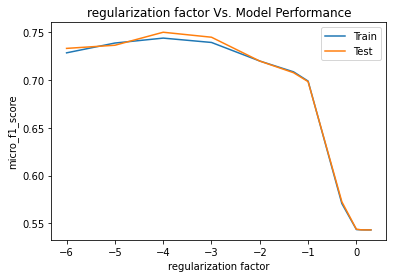

In [ ]:
# Plot curve
plot_parameter_performance(np.log10(lr_list), train_f1, test_f1, 'regularization factor')

__Observation(s)__: For alpha = 0.0001 we got max micro_f1_score

__Best Support vector classifier__

micro f1_score on train data: 0.7441
micro f1_score on test data: 0.7503


              precision    recall  f1-score   support

           0       0.71      0.94      0.81      6452
           1       0.54      0.04      0.07       863
           2       0.85      0.62      0.72      4565

    accuracy                           0.75     11880
   macro avg       0.70      0.53      0.53     11880
weighted avg       0.75      0.75      0.72     11880



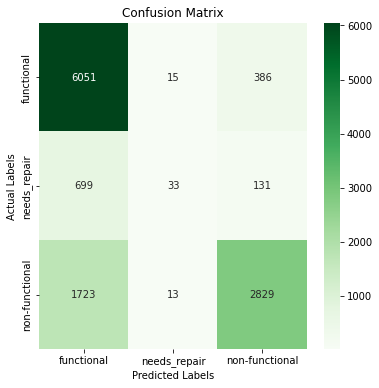

In [ ]:
# Best support vector classifier
best_svc = SGDClassifier(loss='hinge', penalty='l2',
                   alpha=0.0001, random_state=42)

best_svc.fit(X_train_encoded, y_train_encoded)

# predictions
ypred_train = best_svc.predict(X_train_encoded)
ypred_test = best_svc.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")
print("\n")

# Performance on test data
rf_report = classification_report(y_test_encoded, ypred_test)
print(rf_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

###7.2.8 Mixed Voting Classifier 

micro f1_score on train data: 0.9269
micro f1_score on test data: 0.8125


              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6452
           1       0.62      0.28      0.38       863
           2       0.86      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



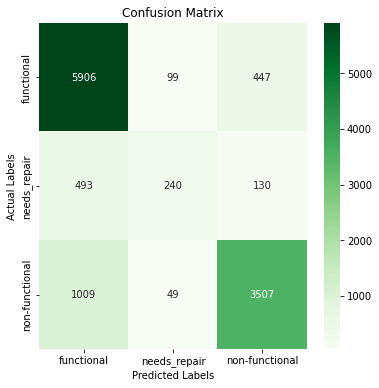

In [ ]:
# Estimators
best_rf = RandomForestClassifier(max_depth=40,
                                 max_features='sqrt',
                                 min_samples_split=8,
                                 n_estimators=280,
                                 random_state=42,
                                 warm_start=False)

best_xgbc = XGBClassifier(colsample_bytree =0.3,
                          eta=0.2,
                          max_depth=12,
                          n_estimators=280,
                          objective='multi:softprob',
                          random_state=42)

best_cbc = CatBoostClassifier(learning_rate=0.2, 
                         iterations = 350,
                         depth=10, 
                         random_seed=42,
                         verbose=0)

best_bgc = BaggingClassifier(n_estimators = 400,
                             max_features = 0.4)

estimators = [("rf", best_rf), ("xgbc", best_xgbc), ("cbc", best_cbc),
              ("bgc", best_bgc)]

# training
mvc = VotingClassifier(estimators=estimators, voting='soft')
mvc.fit(X_train_encoded, y_train_encoded)

# predictions
ypred_train = mvc.predict(X_train_encoded)
ypred_test = mvc.predict(X_test_encoded)

# micro_f1 scores
fscore_train = f1_score(y_train_encoded, ypred_train, average='micro')
fscore_test = f1_score(y_test_encoded, ypred_test, average='micro')
print(f"micro f1_score on train data: {np.round(fscore_train, 4)}")
print(f"micro f1_score on test data: {np.round(fscore_test, 4)}")
print("\n")

# Performance on test data
rf_report = classification_report(y_test_encoded, ypred_test)
print(rf_report)
plot_confusion_matrix(y_test_encoded, ypred_test)

In [ ]:
joblib.dump(mvc, "final_model")

['final_model']

###7.2.9 Random Forest Voting Classifier

Voting Classifier train micro_f1_score: 0.9105639730639731
Voting Classifier test micro_f1_score: 0.8114478114478115

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.60      0.28      0.38       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.66      0.68     11880
weighted avg       0.81      0.81      0.80     11880



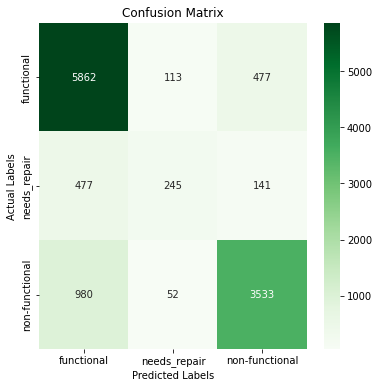

In [ ]:
# Voting classifier with 5 random forest classifiers
rf1 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=42)

rf2 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=2)

rf3 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=23)

rf4 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=84)

rf5 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=123)

rf6 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=246)

rf7 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=168)

rf8 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=201)

rf9 = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=8,
                             n_estimators=280, warm_start=False, random_state=251)

voting_classifier = VotingClassifier(estimators=[('rf1', rf1), ('rf2', rf2),
                                                 ('rf3', rf3), ('rf4', rf4),
                                                 ('rf5', rf5), ('rf6', rf6),
                                                 ('rf7', rf7), ('rf8', rf8),
                                                 ('rf9', rf9)],
                                     voting='hard')

# training
voting_classifier.fit(X_train_encoded, y_train_encoded)

# predictions
ypred_train = voting_classifier.predict(X_train_encoded)
ypred_test = voting_classifier.predict(X_test_encoded)

# micro_f1 scores
f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
print(f"Voting Classifier train micro_f1_score: {f1_train}")
print(f"Voting Classifier test micro_f1_score: {f1_test}")
print()

# performance on test data
report = classification_report(y_test_encoded, ypred_test)
print(report)
plot_confusion_matrix(y_test_encoded, ypred_test)

###7.2.10 XGBoost Voting Classifier

Voting Classifier train micro_f1_score: 0.9208333333333333
Voting Classifier test micro_f1_score: 0.8116161616161615

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6452
           1       0.61      0.26      0.37       863
           2       0.86      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



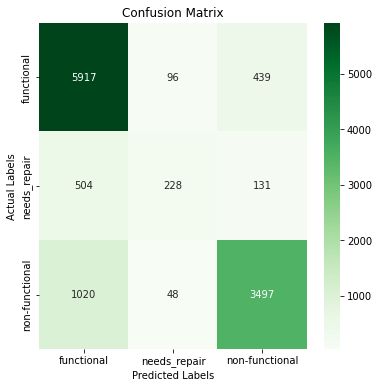

In [ ]:
# Voting classifier with 5 XGBoost classifiers
xgbc1 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=42)

xgbc2 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=2)

xgbc3 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=23)

xgbc4 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=84)

xgbc5 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=123)

xgbc6 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=56)

xgbc7 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=198)

xgbc8 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=256)

xgbc9 = XGBClassifier(colsample_bytree =0.3, eta=0.2, max_depth=12,
                      n_estimators=320, objective='multi:softprob', random_state=155)


voting_classifier = VotingClassifier(estimators=[('xgbc1', xgbc1), ('xgbc2', xgbc2),
                                                 ('xgbc3', xgbc3), ('xgbc4', xgbc4),
                                                 ('xgbc5', xgbc5), ('xgbc6', xgbc6),
                                                 ('xgbc7', xgbc7), ('xgbc8', xgbc8),
                                                 ('xgbc9', xgbc9)],
                                     voting='soft')

voting_classifier.fit(X_train_encoded, y_train_encoded)
ypred_train = voting_classifier.predict(X_train_encoded)
ypred_test = voting_classifier.predict(X_test_encoded)
# micro_f1 scores
f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
print(f"Voting Classifier train micro_f1_score: {f1_train}")
print(f"Voting Classifier test micro_f1_score: {f1_test}")
print()
report = classification_report(y_test_encoded, ypred_test)
print(report)
plot_confusion_matrix(y_test_encoded, ypred_test)

###7.2.11 Separate Models for Numerical and Categorical Data

In [ ]:
# Download separated numerical and categorical data
! gdown 1OXpyNyYE-N6QlRRQ1sunDLOUw8mewfaX
! gdown 1z5WkIazzPbPOAzzcd74DcIBbsY-0stpu
! gdown 1RtlKwk8bJrVGkTnxg-I7hByevFMxhHKz
! gdown 1RZpD4vJV3RpkYMFae01orjQ-gIbDikcr

Downloading...
From: https://drive.google.com/uc?id=1OXpyNyYE-N6QlRRQ1sunDLOUw8mewfaX
To: /content/xtest_categ.npz
100% 102k/102k [00:00<00:00, 45.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z5WkIazzPbPOAzzcd74DcIBbsY-0stpu
To: /content/xtest_num.npy
100% 475k/475k [00:00<00:00, 65.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RtlKwk8bJrVGkTnxg-I7hByevFMxhHKz
To: /content/xtrain_categ.npz
100% 401k/401k [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RZpD4vJV3RpkYMFae01orjQ-gIbDikcr
To: /content/xtrain_num.npy
100% 1.90M/1.90M [00:00<00:00, 192MB/s]


In [ ]:
X_train_categ = sparse.load_npz("xtrain_categ.npz")
X_test_categ = sparse.load_npz("xtest_categ.npz")
X_train_num = np.load("xtrain_num.npy")
X_test_num = np.load("xtest_num.npy")

In [ ]:
# Check performances of various models

# Defining models
models = [KNeighborsClassifier(),
          LogisticRegression(),
          GaussianNB(),
          SVC(kernel='linear',decision_function_shape='ovo'),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          BaggingClassifier(),
          AdaBoostClassifier()]

# Model names
model_names = ["KNN Classifier", "Logistic Regression",
               "Naive Bayes Classifier", "Support Vector Classifier",
               "Decision Tree Classifier",
               "Random Forest Clasifier", "XGBoost Classifier",
               "Bagging Classifier", "AdaBoost Classifier"]

# Initialize scores
train_fscores = []
train_aucs = []
test_fscores = []
test_aucs = []
fit_time= []
 

for model in tqdm(models):
    cv_result = cross_validate(model, X_train_num, y_train_encoded, 
                               scoring=["f1_micro", "roc_auc_ovr"], cv=3,
                               return_train_score=True, n_jobs=-1)
    
    train_fscores.append(np.mean(cv_result.get("train_f1_micro")))
    test_fscores.append(np.mean(cv_result.get("test_f1_micro")))
    train_aucs.append(np.mean(cv_result.get("train_roc_auc_ovr")))
    test_aucs.append(np.mean(cv_result.get("test_roc_auc_ovr")))
    fit_time.append(np.mean(cv_result.get("fit_time")))

results_df = pd.DataFrame({"Model": model_names,
                           "Fit Time": fit_time,
                           "Train micro_f1": train_fscores,
                           "Test micro_f1": test_fscores,
                           "Train auc_score": train_aucs,
                           "Test auc_score": test_aucs})

results_df

100%|██████████| 9/9 [03:46<00:00, 25.11s/it]


,Model,Fit Time,Train micro_f1,Test micro_f1,Train auc_score,Test auc_score
0,KNN Classifier,0.051402,0.748990,0.645286,0.887663,0.731458
1,Logistic Regression,1.233758,0.582765,0.581397,0.628881,0.628585
2,Naive Bayes Classifier,0.015631,0.584954,0.583502,0.621860,0.621908
3,Support Vector Classifier,45.094492,NaN,NaN,NaN,NaN
4,Decision Tree Classifier,0.274055,0.984322,0.636742,0.999435,0.667648
5,Random Forest Clasifier,8.105730,0.984312,0.687542,0.998883,0.798428
6,XGBoost Classifier,5.193499,0.635648,0.625168,0.743729,0.724072
7,Bagging Classifier,1.693144,0.963152,0.678114,0.996721,0.770493
8,AdaBoost Classifier,1.846523,0.592908,0.591982,0.675873,0.666115


In [ ]:
# Check performances of various models

# Defining models
models = [KNeighborsClassifier(),
          LogisticRegression(),
          GaussianNB(),
          SVC(kernel='linear',decision_function_shape='ovo'),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          BaggingClassifier(),
          AdaBoostClassifier()]

# Model names
model_names = ["KNN Classifier", "Logistic Regression",
               "Naive Bayes Classifier", "Support Vector Classifier",
               "Decision Tree Classifier",
               "Random Forest Clasifier", "XGBoost Classifier",
               "Bagging Classifier", "AdaBoost Classifier"]

# Initialize scores
train_fscores = []
train_aucs = []
test_fscores = []
test_aucs = []
fit_time= []
 

for model in tqdm(models):
    cv_result = cross_validate(model, X_train_categ, y_train_encoded, 
                               scoring=["f1_micro", "roc_auc_ovr"], cv=3,
                               return_train_score=True, n_jobs=-1)
    
    train_fscores.append(np.mean(cv_result.get("train_f1_micro")))
    test_fscores.append(np.mean(cv_result.get("test_f1_micro")))
    train_aucs.append(np.mean(cv_result.get("train_roc_auc_ovr")))
    test_aucs.append(np.mean(cv_result.get("test_roc_auc_ovr")))
    fit_time.append(np.mean(cv_result.get("fit_time")))

results_df = pd.DataFrame({"Model": model_names,
                           "Fit Time": fit_time,
                           "Train micro_f1": train_fscores,
                           "Test micro_f1": test_fscores,
                           "Train auc_score": train_aucs,
                           "Test auc_score": test_aucs})

results_df

100%|██████████| 9/9 [19:35<00:00, 130.57s/it]


,Model,Fit Time,Train micro_f1,Test micro_f1,Train auc_score,Test auc_score
0,KNN Classifier,0.017645,0.798622,0.753472,0.896305,0.823605
1,Logistic Regression,2.487473,0.746833,0.742824,0.849913,0.841799
2,Naive Bayes Classifier,0.008306,NaN,NaN,NaN,NaN
3,Support Vector Classifier,198.445461,NaN,NaN,NaN,NaN
4,Decision Tree Classifier,2.627166,0.855798,0.764689,0.960282,0.820462
5,Random Forest Clasifier,68.377582,0.855787,0.775084,0.956693,0.865436
6,XGBoost Classifier,6.265714,0.741098,0.738552,0.843931,0.836948
7,Bagging Classifier,21.826942,0.851978,0.768729,0.953441,0.854645
8,AdaBoost Classifier,2.145546,0.716488,0.715299,0.794496,0.790355


In [ ]:
# Custom Voting Classifier
rf_num = RandomForestClassifier(250)
rf_num.fit(X_train_num, y_train_encoded)
xgb_num = XGBClassifier(250)
xgb_num.fit(X_train_num, y_train_encoded)
knn_num = KNeighborsClassifier(7)
knn_num.fit(X_train_num, y_train_encoded)
rf_categ = RandomForestClassifier(250)
rf_categ.fit(X_train_categ, y_train_encoded)
lr_categ = LogisticRegression()
lr_categ.fit(X_train_categ, y_train_encoded)
knn_categ = KNeighborsClassifier(7)
knn_categ.fit(X_train_categ, y_train_encoded)
bag_categ = BaggingClassifier()
bag_categ.fit(X_train_categ, y_train_encoded)

BaggingClassifier()

100%|██████████| 11880/11880 [14:36<00:00, 13.55it/s]


Voting Classifier train micro_f1_score: 0.8814814814814815
Voting Classifier test micro_f1_score: 0.7875420875420875


              precision    recall  f1-score   support

           0       0.77      0.91      0.83      6452
           1       0.62      0.21      0.31       863
           2       0.84      0.72      0.78      4565

    accuracy                           0.79     11880
   macro avg       0.74      0.61      0.64     11880
weighted avg       0.78      0.79      0.77     11880



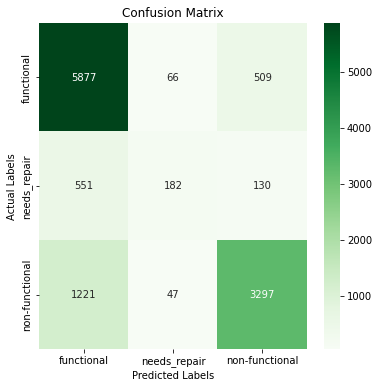

In [ ]:
import statistics as st
def voter_predict(X_test_num, X_test_categ):
    
    predictions = []
    for i in tqdm(range(len(X_test_num))):
        all_preds = []
        all_preds.append(int(rf_num.predict(X_test_num[i].reshape(1, -1))))
        all_preds.append(int(xgb_num.predict(X_test_num[i].reshape(1, -1))))
        all_preds.append(int(knn_num.predict(X_test_num[i].reshape(1, -1))))
        all_preds.append(int(rf_categ.predict(X_test_categ[i].reshape(1, -1))))
        all_preds.append(int(lr_categ.predict(X_test_categ[i].reshape(1, -1))))
        all_preds.append(int(knn_categ.predict(X_test_categ[i].reshape(1, -1))))
        all_preds.append(int(bag_categ.predict(X_test_categ[i].reshape(1, -1))))
        v, c = np.unique(all_preds, return_counts=True)
        pred = v[np.argmax(c)]
        predictions.append(pred)

    return np.array(predictions).reshape(X_test_num.shape[0],-1)

# predictions
ypred_train = voter_predict(X_train_num, X_train_categ)
ypred_test = voter_predict(X_test_num, X_test_categ)

# micro_f1 scores
f1_train = f1_score(y_train_encoded, ypred_train, average="micro")
f1_test = f1_score(y_test_encoded, ypred_test, average="micro")
print(f"Voting Classifier train micro_f1_score: {f1_train}")
print(f"Voting Classifier test micro_f1_score: {f1_test}")

# performance on test data
print("\n")
print(classification_report(y_test_encoded, ypred_test))
plot_confusion_matrix(y_test_encoded, ypred_test)

##<font color='brown'>7.3 Model Experiments Summary </font>

Summary of all model experiments

In [ ]:
# Models summary
print("Model Experiments Summary: ")
table = PrettyTable(field_names=["Sr. No.", "Model", "train micro_f1score", "test micro_f1score"])
table.add_row([1, "Simple Baseline Model", 0.5431, 0.5431])
table.add_row([2, "ML Baseline Model", 0.7480, 0.7492])
table.add_row([3, "Random Forest Classifier", 0.9104, 0.8132])
table.add_row([4, "XGBoost Classifier", 0.9184, 0.8110])
table.add_row([5, "Cat Boost Classifier", 0.8715, 0.8006])
table.add_row([6, "Bagging Classifier", 0.9933, 0.8093])
table.add_row([7, "Logistic Regression (SGD)", 0.7480, 0.7486])
table.add_row([8, "Support Vector Classifier (SGD)", 0.7441, 0.7503])
table.add_row([9, "Mixed Voting Classifier", 0.9269, 0.8125])
table.add_row([10, "Random Forest Voting Classifier", 0.9105, 0.8114])
table.add_row([11, "XGBoost Voting Classifier", 0.9208, 0.8116])
table.add_row([12, "Custom Voting Classifier", 0.8815, 0.7875])
print(table)

Model Experiments Summary: 
+---------+---------------------------------+---------------------+--------------------+
| Sr. No. |              Model              | train micro_f1score | test micro_f1score |
+---------+---------------------------------+---------------------+--------------------+
|    1    |      Simple Baseline Model      |        0.5431       |       0.5431       |
|    2    |        ML Baseline Model        |        0.748        |       0.7492       |
|    3    |     Random Forest Classifier    |        0.9104       |       0.8132       |
|    4    |        XGBoost Classifier       |        0.9184       |       0.811        |
|    5    |       Cat Boost Classifier      |        0.8715       |       0.8006       |
|    6    |        Bagging Classifier       |        0.9933       |       0.8093       |
|    7    |    Logistic Regression (SGD)    |        0.748        |       0.7486       |
|    8    | Support Vector Classifier (SGD) |        0.7441       |       0.7503  

###__Best Model__:

__Random Forest Classifier with__

__Params:__
1. max_depth=40,
2. max_features='sqrt'
3. min_samples_split=8,
4. n_estimators=280

__Performance Metrics:__

1. train_micro_f1_score = 0.9104
1. test_micro_f1_score = 0.8132
